# Importing Libraries

In [1]:
import os
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split 

import tensorflow as tf
import keras

from tensorflow.keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras import models
from keras import layers
from keras.applications import resnet50
from keras.models import *
from keras.layers import *

import matplotlib.pyplot as plt
import cv2

import warnings
warnings.filterwarnings('ignore')

# Path to Images

## Directories

In [2]:
for dirname, _, filenames in os.walk('./data'):
    print(dirname)

./data
./data\cell_images
./data\cell_images\cell_images
./data\cell_images\cell_images\Parasitized
./data\cell_images\cell_images\Uninfected
./data\Parasitized
./data\Uninfected


## Files (Images) (Do Not Run)

In [3]:
# for filename in filenames:
#     print(os.path.join(dirname, filename))

# Data Preparation

In [4]:
def data_prep(parasitized, uninfected):
    
    parasitized = ["./data/Parasitized" + '/' +  parasitize for parasitize in parasitized]
    uninfected = ["./data/Uninfected" + '/' +  uninfect for uninfect in uninfected]

    labels = len(parasitized) * ['parasitized'] + len(uninfected) * ['uninfected']
    data = parasitized + uninfected

    return pd.DataFrame({'Image_Path': data , 'Labels': labels})

In [5]:
df = data_prep(os.listdir("./data/Parasitized/"), os.listdir("./data/Uninfected/"))

In [6]:
df.shape

(27560, 2)

In [7]:
df.head()

,Image_Path,Labels
0,./data/Parasitized/C100P61ThinF_IMG_20150918_1...,parasitized
1,./data/Parasitized/C100P61ThinF_IMG_20150918_1...,parasitized
2,./data/Parasitized/C100P61ThinF_IMG_20150918_1...,parasitized
3,./data/Parasitized/C100P61ThinF_IMG_20150918_1...,parasitized
4,./data/Parasitized/C100P61ThinF_IMG_20150918_1...,parasitized


In [8]:
df.tail()

,Image_Path,Labels
27555,./data/Uninfected/C99P60ThinF_IMG_20150918_142...,uninfected
27556,./data/Uninfected/C99P60ThinF_IMG_20150918_142...,uninfected
27557,./data/Uninfected/C99P60ThinF_IMG_20150918_142...,uninfected
27558,./data/Uninfected/C99P60ThinF_IMG_20150918_142...,uninfected
27559,./data/Uninfected/Thumbs.db,uninfected


In [9]:
df.describe()

,Image_Path,Labels
count,27560,27560
unique,27560,2
top,./data/Parasitized/C100P61ThinF_IMG_20150918_1...,parasitized
freq,1,13780


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27560 entries, 0 to 27559
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_Path  27560 non-null  object
 1   Labels      27560 non-null  object
dtypes: object(2)
memory usage: 430.8+ KB


# Displaying Images

## Parasitized

Displaying 5 Parasitized Images: 



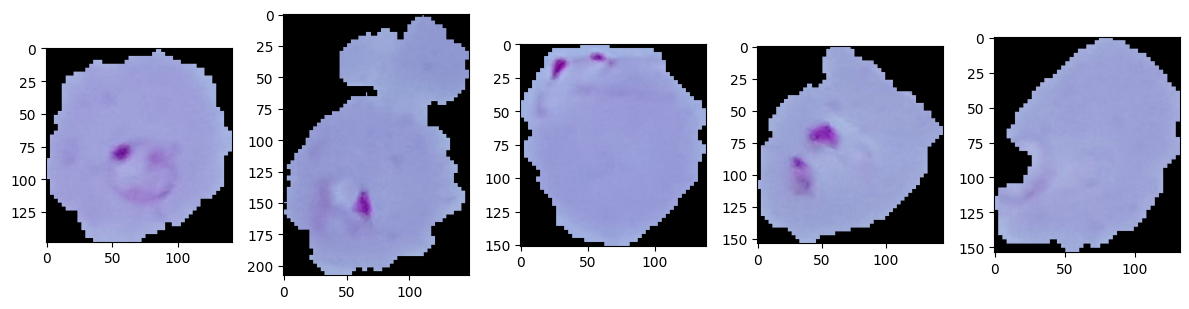

In [11]:
print("Displaying 5 Parasitized Images: ")
print()
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(df[df['Labels'] == 'parasitized']['Image_Path'][i])
    plt.imshow(img)
    plt.tight_layout()
plt.show()

## Uninfected

Displaying 5 Uninfected Images: 



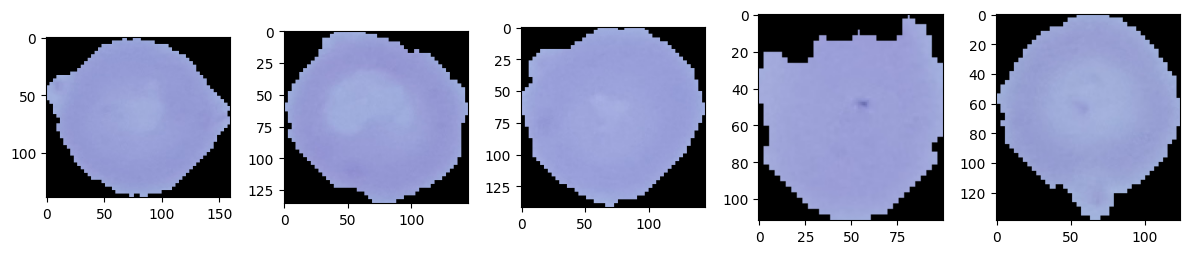

In [12]:
print("Displaying 5 Uninfected Images: ")
print()
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(df[df['Labels'] == 'uninfected']['Image_Path'].reset_index(drop=True)[i])
    plt.imshow(img)
    plt.tight_layout()
plt.show()

# Distribution

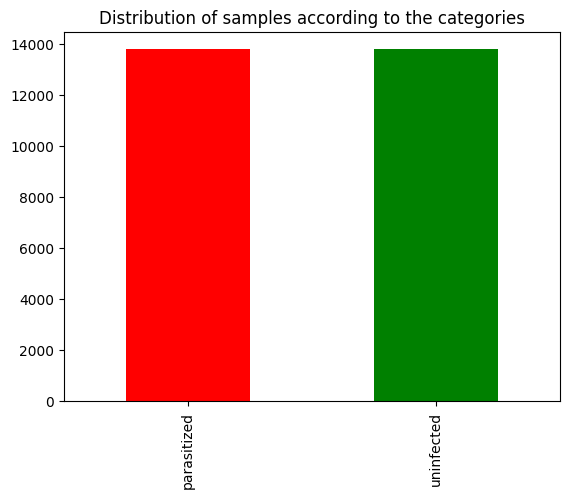

In [13]:
df['Labels'].value_counts().plot(kind = 'bar', color = ['red', 'green'])
plt.title('Distribution of samples according to the categories')
plt.show()

# Splitting the Data

In [14]:
train, test = train_test_split(df, test_size = .20)

# Callbacks

In [15]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

# Data Augmentation

img_data_generator = ImageDataGenerator(...): <br> 
This code initializes an image data generator using ImageDataGenerator from the Keras library. <br> 
This data generator is used for data augmentation, which means it will create variations of the training images to increase the diversity of the data and improve the model's generalization. <br> 
The specified data augmentation techniques include rotation, width shift, height shift, shear, zoom, and horizontal flip.<br> 

In [16]:
img_data_generator = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest', validation_split=0.2)

# Plot Loss and Accuracy

# Explanation of the `plot_loss_and_accuracy` Function

The `plot_loss_and_accuracy` function is used to visualize the training and validation metrics (accuracy and loss) of a machine learning model during training. This function takes as input the training history (`mo_fit`) returned by Keras' `fit` method, which contains the recorded values of accuracy and loss at each epoch during training.

Here's a breakdown of what this function does:

1. **Extract Metrics**: It extracts the following metrics from the `mo_fit` history:
   - `accuracy`: Training accuracy at each epoch.
   - `loss`: Training loss at each epoch.
   - `validation_loss`: Validation loss at each epoch.
   - `validation_accuracy`: Validation accuracy at each epoch.

2. **Create Subplots**: It creates a 2x2 subplot figure using `plt.figure` with four subplots for plotting the training and validation metrics.

3. **First Subplot (Top-Left)**:
   - Plots the training accuracy and validation accuracy on the same graph over epochs.
   - Adds a legend indicating which line corresponds to training accuracy and which one to validation accuracy.
   - Sets the title as "Accuracy: Training vs. Validation."

4. **Second Subplot (Top-Right)**:
   - Plots the training loss and validation loss on the same graph over epochs.
   - Adds a legend indicating which line corresponds to training loss and which one to validation loss.
   - Sets the title as "Loss: Training vs. Validation."

5. **Display Plot**: Finally, it displays the entire figure with the plotted metrics using `plt.show()`.

In [17]:
def plot_loss_and_accuracy(mo_fit):
    
    accuracy = mo_fit.history['accuracy']
    loss = mo_fit.history['loss']
    validation_loss = mo_fit.history['val_loss']
    validation_accuracy = mo_fit.history['val_accuracy']

    plt.figure(figsize=(15, 7))
    plt.subplot(2, 2, 1)
    plt.plot(range(len(accuracy)), accuracy, label='Training Accuracy')
    plt.plot(range(len(accuracy)), validation_accuracy, label='Validation Accuracy')
    plt.legend(loc='upper left')
    plt.title('Accuracy : Training Vs Validation ')

    plt.subplot(2, 2, 2)
    plt.plot(range(len(accuracy)), loss, label='Training Loss')
    plt.plot(range(len(accuracy)), validation_loss, label='Validation Loss')
    plt.title('Loss : Training Vs Validation ')
    plt.legend(loc='upper right')
    
    plt.show()

# CNN

In [18]:
def cnn_model(df, train, test, my_callbacks):
    
    x_train = img_data_generator.flow_from_dataframe(dataframe=train,  x_col='Image_Path', y_col='Labels',  
                                               class_mode='binary', target_size=(134,134), shuffle=True, 
                                               batch_size=10, seed=10, subset='training')
    
    x_test = img_data_generator.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',
                                             class_mode='binary', target_size=(134,134), shuffle=True, 
                                             batch_size=10, seed=10, subset='validation')
    
    model = tf.keras.Sequential(
        [
            tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=32, activation='relu', padding='same'),
            tf.keras.layers.MaxPool2D(pool_size=(2,2)),
            
            tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=32, activation='relu', padding='same'),
            tf.keras.layers.MaxPool2D(pool_size=(2,2)),

            tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=32, activation='relu', padding='same'),
            tf.keras.layers.MaxPool2D(pool_size=(2,2)),
            
            tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=64, activation='relu', padding='same'),
            tf.keras.layers.MaxPool2D(pool_size=(2,2)),
            
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dropout(rate=0.5),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                 )
    
    model_history = model.fit_generator(generator=x_train, 
                                        steps_per_epoch=100,
                                        epochs=4,
                                        validation_data=x_test,
                                        validation_steps=100, 
                                        callbacks=my_callbacks
                                       )
    
    return model_history

Found 17638 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.
Epoch 1/4
100/100 [==============================] - 15s 138ms/step - loss: 2.9358 - accuracy: 0.5260 - val_loss: 0.6678 - val_accuracy: 0.6030
Epoch 2/4
100/100 [==============================] - 13s 128ms/step - loss: 0.6924 - accuracy: 0.5500 - val_loss: 0.6674 - val_accuracy: 0.6160
Epoch 3/4
100/100 [==============================] - 13s 131ms/step - loss: 0.6797 - accuracy: 0.5830 - val_loss: 0.6588 - val_accuracy: 0.6190
Epoch 4/4
100/100 [==============================] - 13s 126ms/step - loss: 0.6647 - accuracy: 0.6110 - val_loss: 0.6682 - val_accuracy: 0.5550


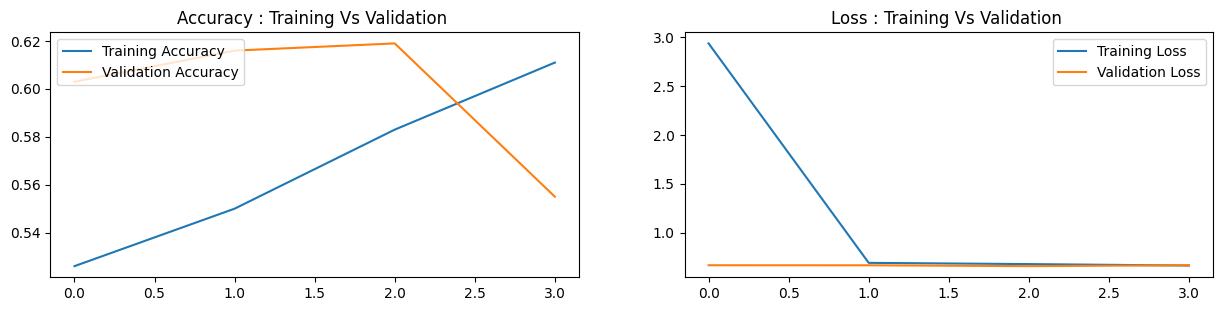

In [19]:
plot_loss_and_accuracy(cnn_model(df, train, test, my_callbacks))

# ResNet50

In [20]:
def resnet_model(df, train, test, my_callbacks):
    x_train = img_data_generator.flow_from_dataframe(dataframe=train,  x_col='Image_Path', y_col='Labels',  
                                               class_mode='binary', target_size=(64,64), shuffle=False, 
                                               batch_size=10, seed=10, subset='training')
    
    x_test = img_data_generator.flow_from_dataframe(dataframe=test, x_col='Image_Path', y_col='Labels',
                                             class_mode='binary', target_size=(64,64), shuffle=False, 
                                             batch_size=10, seed=10, subset='validation')
    
    resnet_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(64,64,3))
    
    model = Sequential()
    
    model.add(resnet_model)
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-4),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    model_history = model.fit(
        x_train,
        steps_per_epoch=100,
        validation_data=x_test,
        validation_steps=100,
        epochs=4, 
        callbacks=my_callbacks
    )
    
    return model_history

Found 17638 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.


Epoch 1/4
100/100 [==============================] - 83s 741ms/step - loss: 3.0487 - accuracy: 0.6390 - val_loss: 4611.1172 - val_accuracy: 0.5010
Epoch 2/4
100/100 [==============================] - 73s 730ms/step - loss: 0.8050 - accuracy: 0.8136 - val_loss: 929.7687 - val_accuracy: 0.5010
Epoch 3/4
100/100 [==============================] - 74s 736ms/step - loss: 0.4546 - accuracy: 0.8760 - val_loss: 148.0621 - val_accuracy: 0.6250
Epoch 4/4
100/100 [==============================] - 76s 765ms/step - loss: 0.3308 - accuracy: 0.9020 - val_loss: 7.3471 - val_accuracy: 0.9000


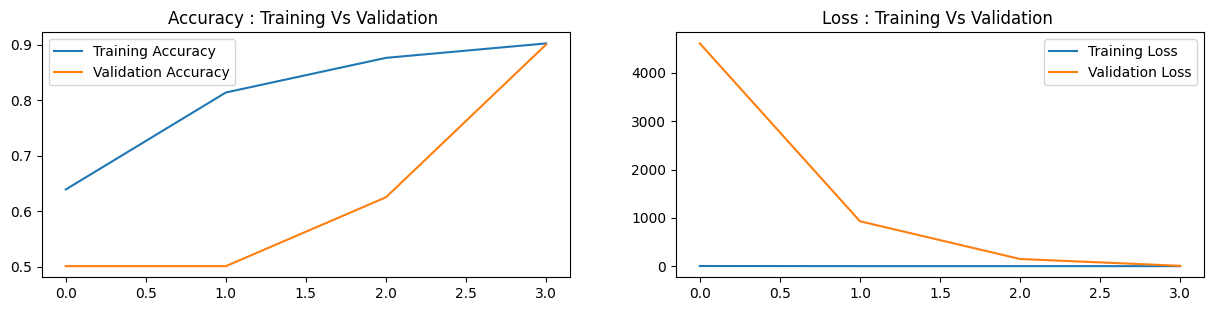

In [21]:
plot_loss_and_accuracy(resnet_model(df, train, test, my_callbacks))

# VGG19

In [22]:
def vgg19_model(df, train, test, my_callbacks):
    x_train = img_data_generator.flow_from_dataframe(dataframe=train, x_col='Image_Path', y_col='Labels',  
                                               class_mode='binary', target_size=(224,224), shuffle=False, 
                                               batch_size=10, seed=10, subset='training')
    
    x_test = img_data_generator.flow_from_dataframe(dataframe=test, x_col='Image_Path', y_col='Labels',
                                             class_mode='binary', target_size=(224,224), shuffle=False, 
                                             batch_size=10, seed=10, subset='validation')
    
    vgg19_model = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)
    
    model = Sequential()
    
    model.add(vgg19_model)
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-4),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    model_history = model.fit(
        x_train,
        steps_per_epoch=100,
        validation_data=x_test,
        validation_steps=100, 
        epochs=4 , 
        callbacks=my_callbacks
    )
    
    return model_history

Found 17638 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.


Epoch 1/4
100/100 [==============================] - 632s 6s/step - loss: 210509.0312 - accuracy: 0.5180 - val_loss: 0.6940 - val_accuracy: 0.5020
Epoch 2/4
100/100 [==============================] - 630s 6s/step - loss: 0.8575 - accuracy: 0.4850 - val_loss: 0.6932 - val_accuracy: 0.5010
Epoch 3/4
100/100 [==============================] - 634s 6s/step - loss: 0.6935 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5010
Epoch 4/4
100/100 [==============================] - 632s 6s/step - loss: 4.5193 - accuracy: 0.4840 - val_loss: 0.6964 - val_accuracy: 0.5010


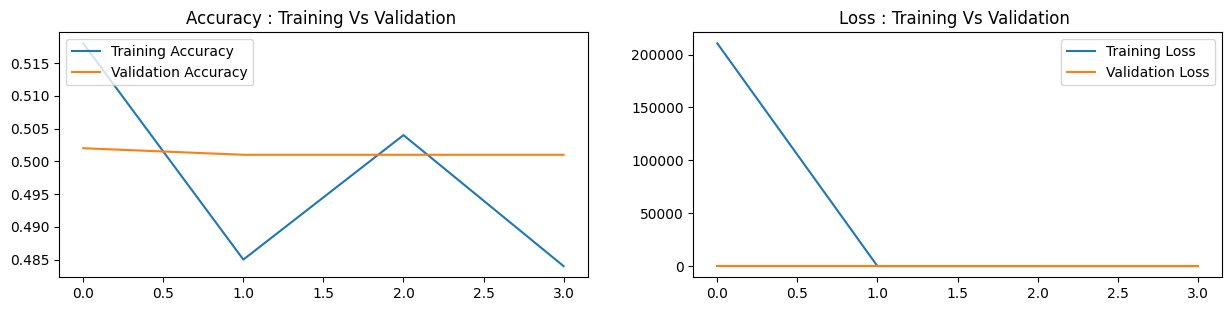

In [23]:
plot_loss_and_accuracy(vgg19_model(df, train, test, my_callbacks))

# Inception V3

In [24]:
def inception_v3_model(df, train, test, my_callbacks):
    x_train = img_data_generator.flow_from_dataframe(dataframe=train, x_col='Image_Path', y_col='Labels',  
                                               class_mode='binary', target_size=(299, 299), shuffle=False, 
                                               batch_size=10, seed=10, subset='training')
    
    x_test = img_data_generator.flow_from_dataframe(dataframe=test, x_col='Image_Path', y_col='Labels',
                                             class_mode='binary', target_size=(299, 299), shuffle=False, 
                                             batch_size=10, seed=10, subset='validation')
    
    vgg19_model = VGG19(input_shape=(299, 299,3), weights='imagenet', include_top=False)
    
    model = Sequential()
    
    model.add(vgg19_model)
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(
        optimizer=keras.optimizers.RMSprop(lr=1e-4),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    
    model_history = model.fit(
        x_train,
        steps_per_epoch=100,
        validation_data=x_test,
        validation_steps=100, 
        epochs=4 , 
        callbacks=my_callbacks
    )
    
    return model_history

Found 17638 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.


Epoch 1/4
100/100 [==============================] - 1067s 11s/step - loss: 33196.6055 - accuracy: 0.4890 - val_loss: 0.6952 - val_accuracy: 0.4920
Epoch 2/4
100/100 [==============================] - 1059s 11s/step - loss: 2.0919 - accuracy: 0.4990 - val_loss: 0.6937 - val_accuracy: 0.5010
Epoch 3/4
100/100 [==============================] - 1059s 11s/step - loss: 1.8053 - accuracy: 0.5100 - val_loss: 0.6931 - val_accuracy: 0.4900
Epoch 4/4
100/100 [==============================] - 1053s 11s/step - loss: 0.8067 - accuracy: 0.5120 - val_loss: 0.6932 - val_accuracy: 0.4990


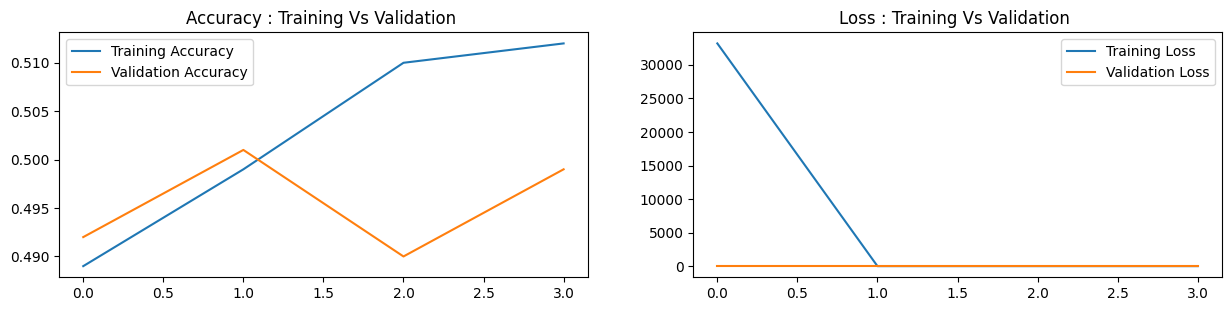

In [25]:
plot_loss_and_accuracy(inception_v3_model(df, train, test, my_callbacks))